In [1]:
import numpy as np

In [2]:
data = np.loadtxt("data.csv", delimiter = ",")
# by default the delimiter is white space in loadtxt but since it is a csv file. So we have comma separated columns
# therefore the delimiter has been changed to ","

In [3]:
data.shape

(100, 2)

In [4]:
x = data[:, 0].reshape(-1,1)    # to reshape into a 2-D array
y = data[:, 1]

In [5]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x,y)

In [6]:
from sklearn.linear_model import LinearRegression
alg1 = LinearRegression()
alg1.fit(X_train,Y_train)
# it will show an error as the linear regression algorithm expected a 2-D array but we gave it a 1-D array
# can reshape it though into a 2-D array

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
alg1.coef_   # this will give us the m of mx + c

array([1.41132174])

In [8]:
alg1.intercept_

3.664377519733719

In [9]:
import matplotlib.pyplot as plt
m = alg1.coef_[0]
c = alg1.intercept_

x_line = np.arange(30,75,0.1)    # don't need to take the step as 0.1 in arange as line will be same even if using only
                                # two points to figure out the plot
y_line = m * x_line + c
plt.plot(x_line,y_line,color = "red")
train_1d = X_train.reshape(75)  # reshaped the data into a 1-D array
plt.scatter(X_train,Y_train)
plt.show()

<Figure size 640x480 with 1 Axes>

#### we plotted the line using the values of m and c found which belongs to the equation y = mx + c
#### and then we scattered the training data over it
#### the line produced by the algorithm learning from the training data is as shown below and the training data points are also
#### scattered on the graph.
#### what the algorithm was trying to do was find the best possible line that makes the scattered points closest to it if not on it
#### the below line is the best possible line as given by the Linear Regression algorithm

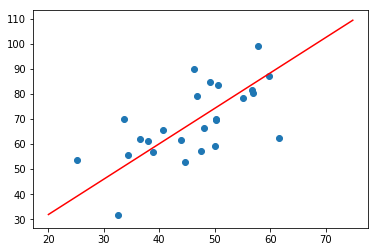

In [10]:
m = alg1.coef_
c = alg1.intercept_

x_line = np.arange(20,75,0.1)
y_line = m * x_line + c
plt.plot(x_line,y_line,color = "red")
train_1d = X_test.reshape(25)
plt.scatter(X_test,Y_test)
plt.show()

#### now what we did was plot the same exact line whose values of intercept and slope we got from the linear regression algorithm
#### and then we scattered the testing data on it. the idea was that the line generated would be the most nearest to if not on the
#### testing data
#### the findings are like above where the red line is the line generated by the Linear Regression Algorithm and the scattered points of the testing data are shown by blue dots

In [11]:
score_train = alg1.score(X_train,Y_train)
print(score_train)
score_test = alg1.score(X_test,Y_test)
print(score_test)

# depends on the data how satisfying the score is going to be
# we might be happy with 0.7 score on some data and we might not even be happy with 0.9 score on some data

0.6456723955700019
0.3518079599048166


In [12]:
X_train = X_train.reshape(75)
Y_train = Y_train.reshape(75)
X_test = X_test.reshape(25)
Y_test = Y_test.reshape(25)
# getting rid of 2-D data that we did earlier because our functions are going to work fine for 1-D array


def fit(X_train,Y_train):
    m = ((X_train * Y_train).mean() - (X_train.mean() * Y_train.mean()))/((X_train ** 2).mean() - ((X_train.mean()) ** 2))
    c = Y_train.mean() - (m * (X_train.mean()))
    return m,c

In [13]:
def predict(X_test,m,c):
    Y_pred = m * X_test + c
    return Y_pred

In [14]:
def COD(Y_test,Y_pred):          # COD is Coefficient of Determination
    u = ((Y_test - Y_pred) ** 2).sum()
    v = ((Y_test - Y_test.mean()) ** 2).sum()
    score = 1 - u/v
    return score

In [15]:
def cost(X_train,Y_train,m,c):
#     cost = ((Y_train - m * X_train - c) ** 2).sum()    # can also do .mean() here. the value will be a bit low but the 
                                                       # comparison will be correct because .sum() or .mean() is not going to affect the cost
    cost = ((Y_train - m * X_train - c) ** 2).mean()
    return cost

In [16]:
m,c = fit(X_train,Y_train)
# testing data
Y_test_pred = predict(X_test,m,c)
score_test = COD(Y_test,Y_test_pred)

# training data
Y_train_pred = predict(X_train,m,c)
score_train = COD(Y_train,Y_train_pred)


cost = cost(X_train,Y_train,m,c)     # to check if the cost function is correct. we can check the cost function at m + 1
                                     # the value received at m + 1 should be a lot higher than received at m because the value
                                     # value of m and c we took was for minimising the cost function


print("m is ", m ," and c is ",c)
print("score on testing data is ", score_test)
print("score on training data is ", score_train)
print("cost is ",cost)      # final cost on the training data. not on the training data but on the testing data

m is  1.4113217390184818  and c is  3.6643775197329376
score on testing data is  0.3518079599048115
score on training data is  0.6456723955700019
cost is  102.3181926431929
